# Air Pollution Death Rate And Clean Fuel and Techs

In this notebook, I will see if there is any correlation between the death rate due to pollution and the percentage of the population with access to clean fuel and tech.     The data came from Kaggle.com | World Health Statistics 2020|Complete|Geo-Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
airpollution_df = pd.read_csv("AirPollutionDeathRate.csv")
airpollution_df.head()

,Location,Dim2,Indicator,Period,Dim1,First Tooltip
0,Afghanistan,Total,Ambient and household air pollution attributab...,2016,Both sexes,95.12 [85.12-104.3]
1,Afghanistan,Total,Ambient and household air pollution attributab...,2016,Male,95.58 [85.5-106]
2,Afghanistan,Total,Ambient and household air pollution attributab...,2016,Female,94.63 [84.55-103.9]
3,Afghanistan,Total,Ambient and household air pollution attributab...,2016,Both sexes,211.1 [188.9-231.3]
4,Afghanistan,Total,Ambient and household air pollution attributab...,2016,Male,228.7 [204.6-253.6]


I first read the data. I will now extract the information I want. For instance, I want the most general data frame available. Therefore, I will not consider gender.

First let's look at Total, for Both Sexes, and per 100,000 Population.

In [3]:
Total_bothSexes_Pop = airpollution_df.where(
    (airpollution_df['Dim1'] == 'Both sexes') 
  & (airpollution_df['Indicator'] == 'Ambient and household air pollution attributable death rate (per 100 000 population)') 
  & (airpollution_df['Dim2'] == 'Total')

).dropna()
Total_bothSexes_Pop['Rate'] = Total_bothSexes_Pop['First Tooltip'].str.split('[').str[0]
Total_bothSexes_Pop_clean = Total_bothSexes_Pop.drop(['Dim1','Dim2', 'Period', 'First Tooltip', 'Indicator'], axis = 1)
Total_bothSexes_Pop_clean['Rate'] = pd.to_numeric(Total_bothSexes_Pop_clean['Rate'])
Total_bothSexes_Pop_clean.head()

,Location,Rate
0,Afghanistan,95.12
36,Albania,104.70
72,Algeria,40.33
108,Angola,67.25
144,Antigua and Barbuda,28.29


After removing the columns I will not use, and keeping the average rate without the range into bracket, I will downlaod the second data frame.

In [4]:
cleanFuel_df = pd.read_csv("cleanFuelAndTech.csv")
cleanFuel_df.head()

,Location,Indicator,Period,First Tooltip
0,Afghanistan,Proportion of population with primary reliance...,2018,37
1,Afghanistan,Proportion of population with primary reliance...,2017,34
2,Afghanistan,Proportion of population with primary reliance...,2016,31
3,Afghanistan,Proportion of population with primary reliance...,2015,29
4,Afghanistan,Proportion of population with primary reliance...,2014,27


To match the first data frame, I only need the data from 2016. I will also remove the columns I don't need.

In [5]:
cleanFuel_df = cleanFuel_df.where(cleanFuel_df['Period'] == 2016).dropna()
cleanFuel_df_clean = cleanFuel_df.drop(['Period','Indicator'], axis = 1)
cleanFuel_df_clean.head()


,Location,First Tooltip
2,Afghanistan,31.0
21,Albania,77.0
40,Algeria,95.0
59,Andorra,95.0
78,Angola,48.0


I merge the two data frames, rename some columns for better clarity, and sort the data along with the Pollution rate death, in descending order.

In [6]:
new_df = Total_bothSexes_Pop_clean.merge(cleanFuel_df_clean, how='inner', left_on='Location', right_on='Location')
new_df = new_df.rename(columns={"Rate": "pollution rate death", "First Tooltip": "clean fuel and tech proportion"})
new_df_sort = new_df.sort_values(by=['pollution rate death'],ascending=False)
new_df_sort.head()

,Location,pollution rate death,clean fuel and tech proportion
42,Democratic People's Republic of Korea,230.9,9.0
60,Georgia,184.0,77.0
31,Chad,180.9,5.0
20,Bosnia and Herzegovina,159.3,44.0
115,Nigeria,158.6,7.0


Let's give a quik look to see if we catch any correlation.

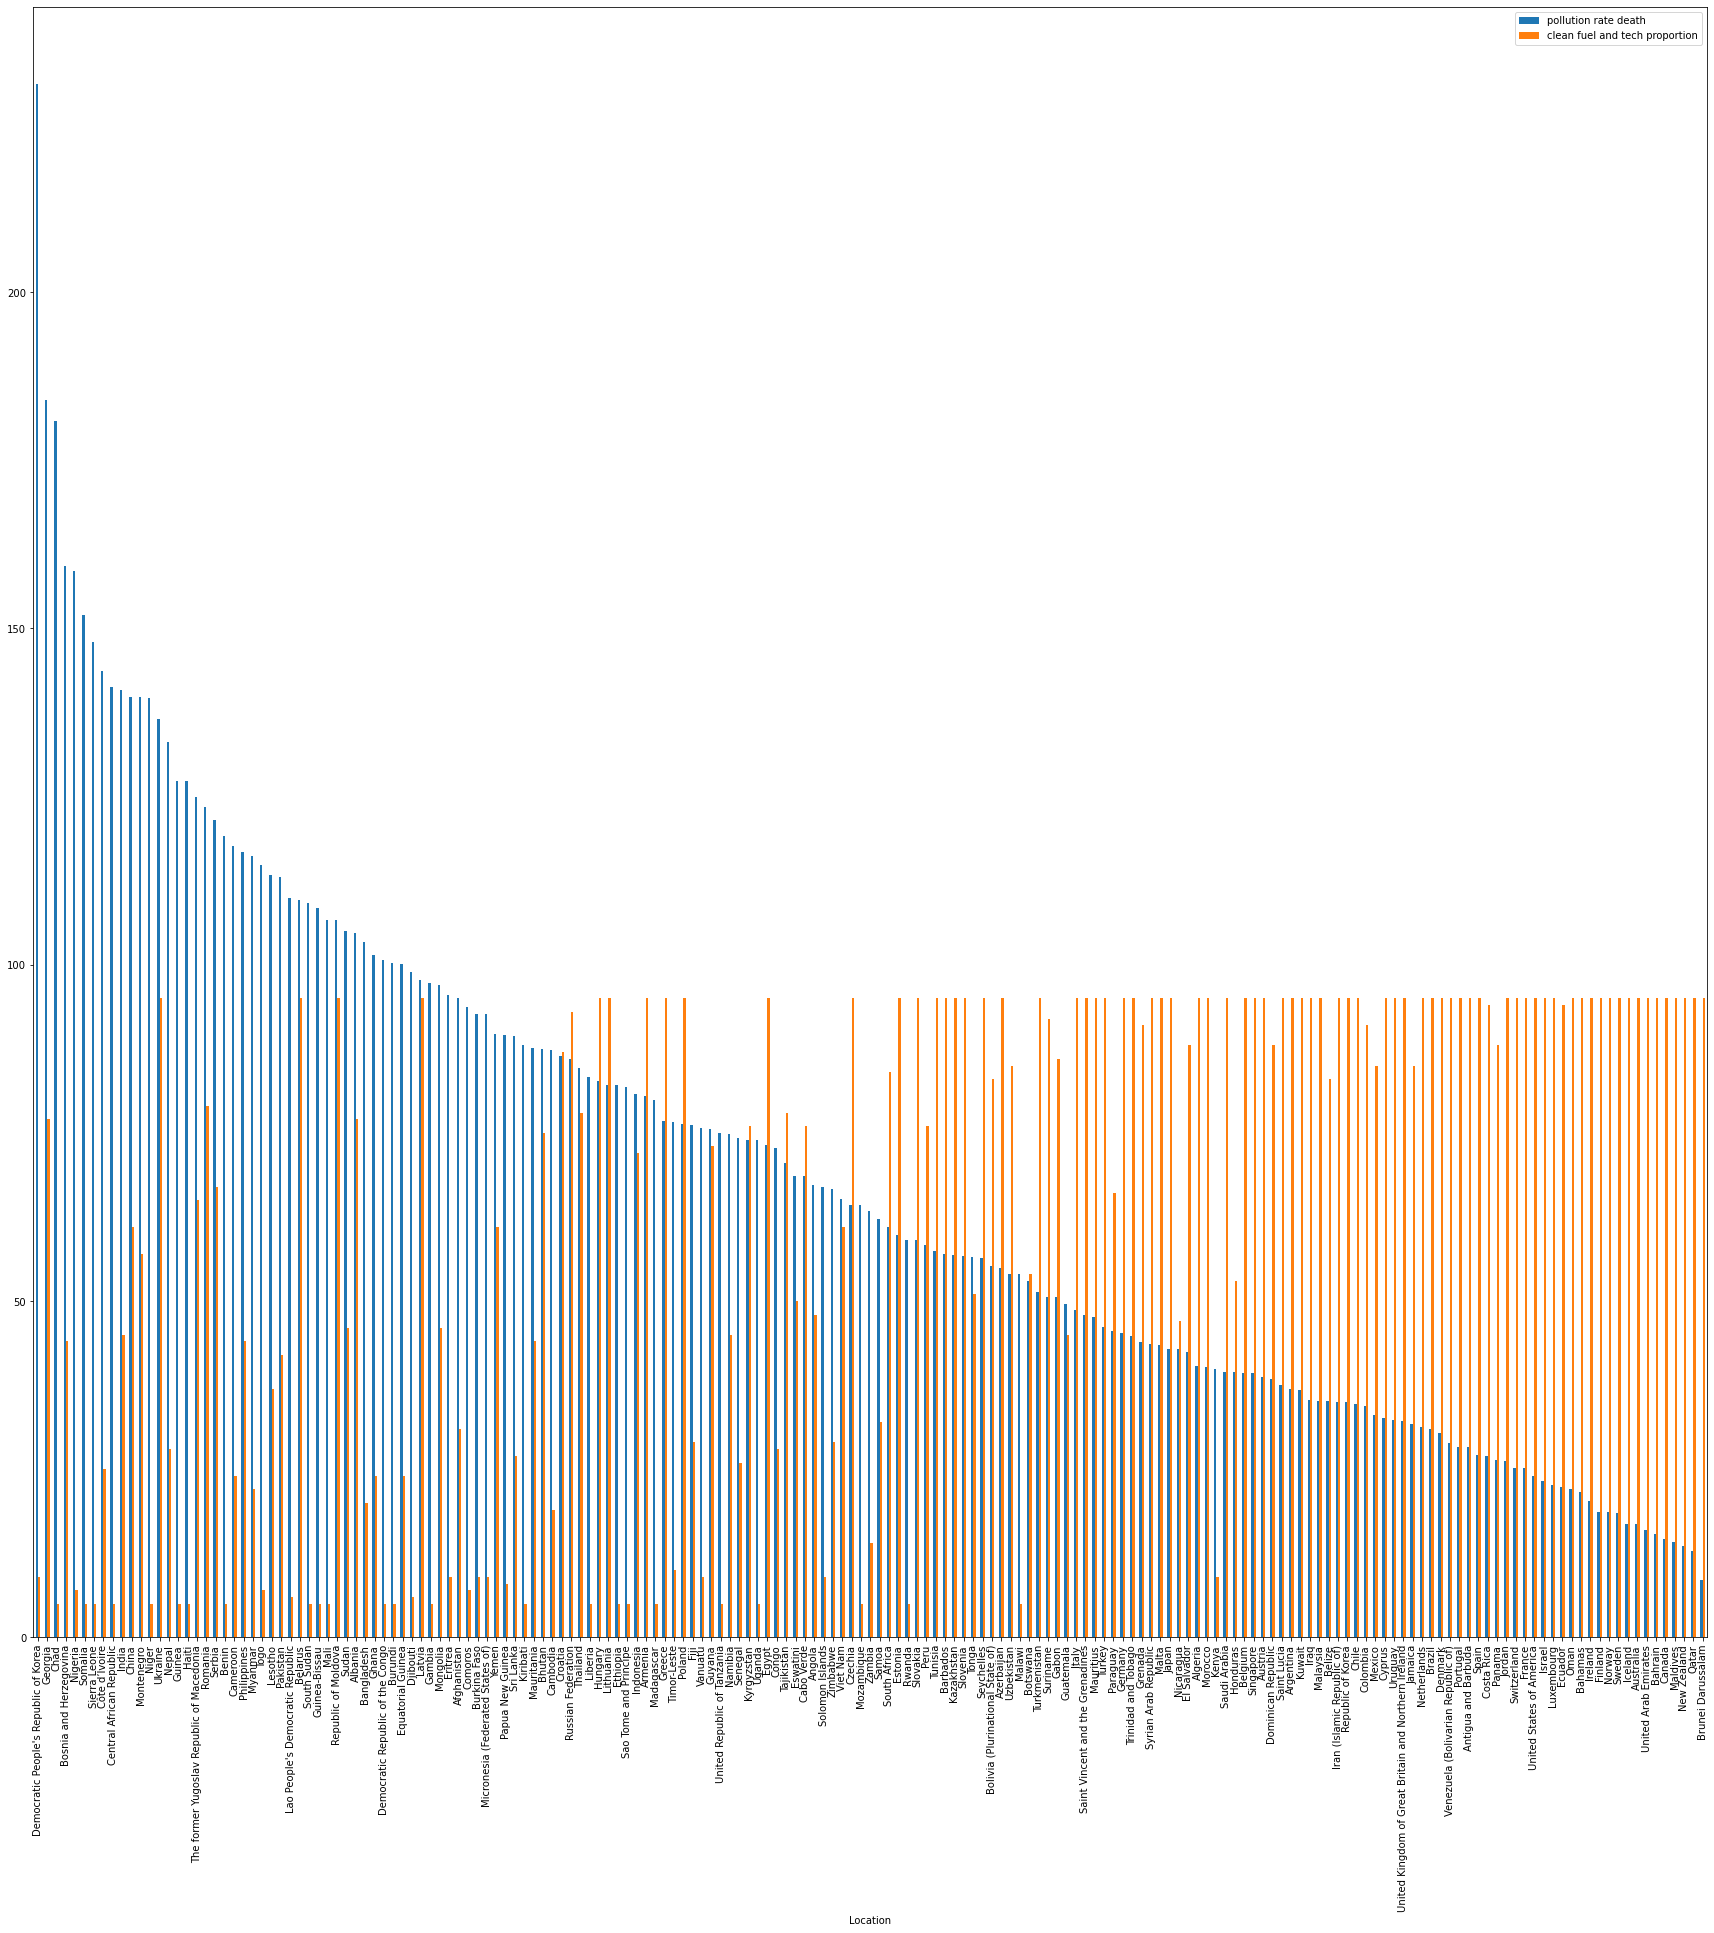

In [7]:
ax = new_df_sort.plot.bar(x= 'Location',rot=90,figsize=(30,30))

At first glance, it appears that the countries with a higher death rate due to pollution have a lower percentage of clean fuel.
Let's try to dig a bit more. 
For example, what is the average death rate for the countries with a clean fuel efficient value inferior to 25%? And superior to 25%?

In [8]:
inf_25 = new_df_sort.where(new_df_sort['clean fuel and tech proportion'] <= 25).dropna()
average_inf25 = inf_25['pollution rate death'].mean()/1000
sup_25 = new_df_sort.where(new_df_sort['clean fuel and tech proportion'] >= 25).dropna()
average_sup25 = sup_25['pollution rate death'].mean()/1000

print('In 2016, a population with less than 25% of clean fuel and tech had a death rate due to pollution at', round(average_inf25,6), " %''")
print('In 2016, a population with more than 25% of clean fuel and tech had a death rate due to pollution at', round(average_sup25,6), " %''")

In 2016, a population with less than 25% of clean fuel and tech had a death rate due to pollution at 0.103675  %''
In 2016, a population with more than 25% of clean fuel and tech had a death rate due to pollution at 0.058533  %''


In [9]:
print('In 2016, a country with less than 25% of its population having access to clean fuel and tech had ',round(average_inf25/average_sup25,2), 'times more risk of dying from pollution.')

In 2016, a country with less than 25% of its population having access to clean fuel and tech had  1.77 times more risk of dying from pollution.
